In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# DataLoader란 Dataset을 batch기반의 딥러닝모델 학습들 위해 미니배치 형태로 만들어 실제로
# 학습할 때 이용할 수 있게 형태를 만들어준다.

# ex)
# DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
#           batch_sampler=None, num_workers=0, collate_fn=None,
#           pin_memory=False, drop_last=False, timeout=0,
#           worker_init_fn=None)

# batch_size => 각 minibatch의 크기 즉 한번의 배치 안에 있는 샘플 사이즈를 말한다.
# shuffle => 매 Epoch마다 데이터셋을 섞어, 데이터가 학습되는 순서를 바꾸는 기능을 말한다.(True 권장.)
# num_worker => 동시에 처리하는 프로세서의 수
# collate_fn => 이 파라미터를 사용하면 별도의 데이터 처리 함수를 만들 수 있다.

In [14]:
from torch.utils.data import Dataloader

dataloader = Dataloader(
    dataset,
    batch_size = 2,
    shuffle = True,
)

2

In [33]:
"""
Pytorch의 dataloader를 사용하기 위해서는 필요한 input벡터들이 적절히 묶인 형태로
데이터 셋을 만들어주어야 한다.
이 과정에서는 zip함수를 사용하여도 되고, 파이토치에서 제공하는 TensorDataset함수를
사용해도 좋다.
"""

import torch
from torch.utils.data import TensorDataset

# 1. dataset 생성
X = torch.tensor([100, 200, 300])
Y = torch.tensor([1, 2, 3])

print(type(X), type(Y))

dataset_zip = list(zip(X, Y))
dataset_TD = TensorDataset(X, Y)

print(type(dataset_zip), type(dataset_TD))

# 2. DataLoader함수 설정(이제 묶은 데이터 셋을 분할해줄 준비)
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset_TD, # 위에서 생성한 데이터 셋
    batch_size = 2, #1회 당 32개의 데이터씩 분할
    shuffle = True # 데이터들의 순서는 섞어서 분할
)

# 3. 순회를 통해 분할된 데이터를 가져와 사용한다.
# DataLoader 객체는 일종의 generator형태로, 인덱싱이 불가능하다 아래처럼 batch단위의 데이터를 가져와 학습에 사용한다.

for batch in dataloader:
  batch_x = batch[0]
  batch_y = batch[1]
  print(batch_x, batch_y)
  #모델에 직접 학습할 시에는 result = model(batch_x, batch_y)와 같이 넣어준다.


<class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'list'> <class 'torch.utils.data.dataset.TensorDataset'>
tensor([300, 200]) tensor([3, 2])
tensor([100]) tensor([1])


In [ ]:
"""
Pytorch의 torchvision 라이브러리는 transforms에서 다양한 변환 기능을 제공한다.
transforms을 사용하여 데이터의 일부 조작을 수행하고 훈련에 적합하게 만든다.

transforms.ToTensor() - 데이터를 tensor로 바꿔준다.
transforms.Normalize(mean, std, inplace=False) - 정규화한다.
transforms.ToPILImage() - csv파일로 데이터셋을 받을 경우, PIL image로 바꿔준다.
transforms.Compose - 여러 단계로 변환해야 하는 경우, Compose를 통해 여러 단계를 묶을 수 있다.
"""

In [51]:
"""
사용자 정의 Transforms.Compose만들기
"""

import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
#Cuda가 잘 돌아가는지 확인한다.

device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [36]:
"""
디폴트 모듈 torchvision.transforms를 이용하면 구현할 수 있지만 custom하는 방법을 알아본다.
"""

transform1 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True, download=True, transform=transform1)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=512, shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False, download=True, transform=transform1)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 42680940.73it/s]


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified


In [49]:
sample = trainset[1][0].numpy()
sample.shape

(3, 32, 32)

numpy.ndarray

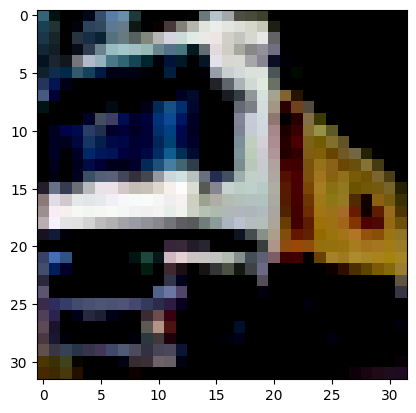

In [56]:
sample = trainset[1][0].numpy()
sample = np.transpose(sample, (1, 2, 0)) #이는 imshow가(:, :, 3)의 파일을 읽는데 우리의 데이터 셋은 (3, :, :)으로 되어있기 때문.
plt.imshow(sample)
type(sample)

(32, 32, 3)